In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import seaborn as sns

In [29]:
df=pd.read_csv("C:/Users/USER/Downloads/archive (26)/adult_data.csv")

In [30]:
df.head()

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [31]:
df.shape

(48842, 16)

In [32]:
df.isnull().sum()

x                  0
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [33]:
(df=='?').sum()

x                     0
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [34]:
df.drop(['x','capital-gain','capital-loss'],axis=1,inplace=True)

In [35]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K


In [36]:
index_names = df[ (df['workclass']=='?') & (df['occupation']=='?') | (df['native-country']=='?')  ].index
  
# drop these given row
# indexes from dataFrame
df.drop(index_names,inplace=True)

In [37]:
(df=='?').sum()

age                 0
workclass           0
fnlwgt              0
education           0
educational-num     0
marital-status      0
occupation         10
relationship        0
race                0
gender              0
hours-per-week      0
native-country      0
income              0
dtype: int64

In [38]:
# df['occupation'].mode()
# better

0    Craft-repair
Name: occupation, dtype: object

In [40]:
df.replace(to_replace="?",value=(df['occupation'].value_counts().index[0]),inplace=True)

In [41]:
(df=='?').sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [47]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
hours-per-week      int64
native-country     object
income             object
dtype: object

In [ ]:
df.replace(to_replace="?",value=(df['occupation'].value_counts().index[0]),inplace=True)

<AxesSubplot: >

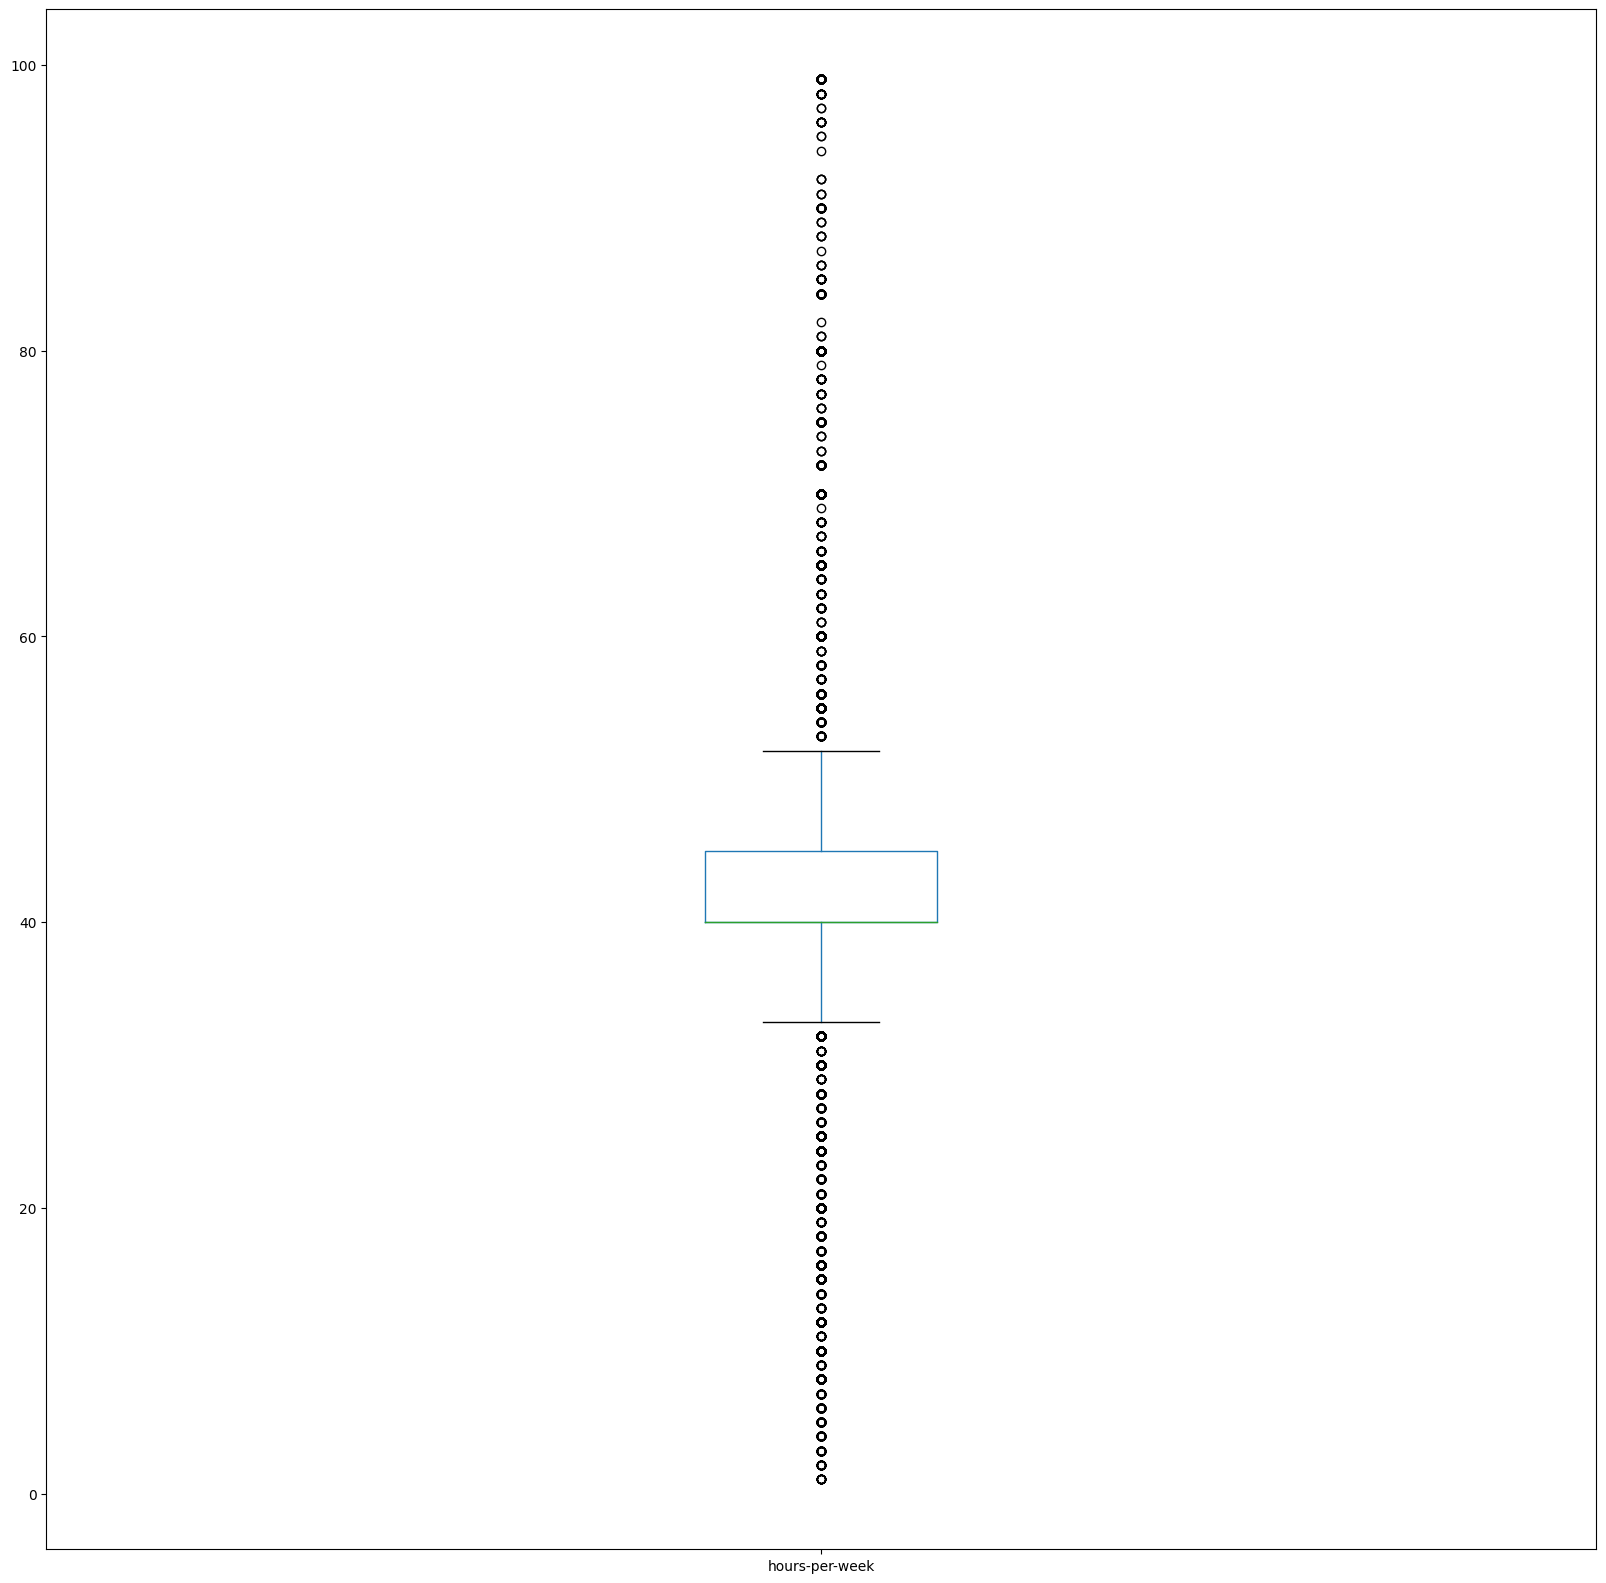

In [49]:
df.boxplot(column =['hours-per-week'], grid = False ,figsize=(5,20))

<AxesSubplot: >

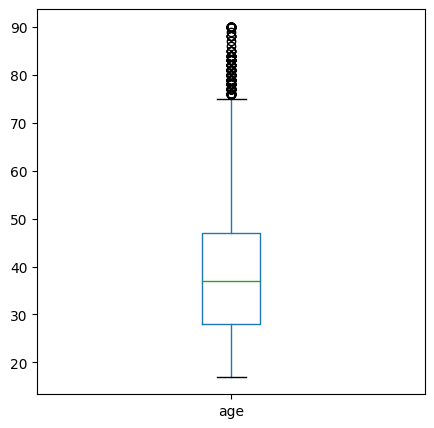

In [56]:
df.boxplot(column =['age'], grid = False ,figsize=(5,5))
# logically there's no outliers 

In [90]:
z_new_win=winsorize(df["hours-per-week"],(0.16,0.12))

<AxesSubplot: >

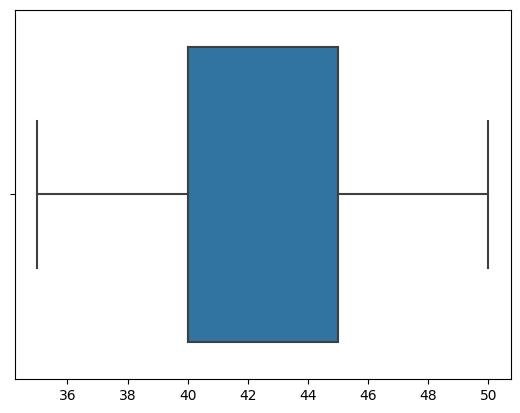

In [91]:
sns.boxplot(x=z_new_win)

In [93]:
if list(df.duplicated()) ==True:
    print("there is duplication")
else:
    print("there is nothing")

there is nothing
